In [1]:
import pandas as pd
import numpy as np

In [3]:
users = pd.read_csv('/Users/both/Downloads/users.csv')
google_users = pd.read_csv('/Users/both/Downloads/google_users.csv')

In [4]:
users.head(5)

,user_id,is_activated,signed_up_on,last_login,sign_up_source,unsubscribed,user_type
0,48063,True,13/06/2019 23:37,13/06/2019 23:39,NaN,0,1
1,50616,True,5/07/2019 10:14,5/07/2019 10:14,google,0,1
2,46065,True,4/06/2019 7:26,4/06/2019 7:26,google,0,1
3,52503,True,7/07/2019 0:29,7/07/2019 2:53,NaN,0,1
4,55278,True,7/07/2019 7:22,7/07/2019 7:27,NaN,0,1


In [5]:
google_users.head(5)

,id,Unnamed: 1,user_id,browser_ language_code,created_on,device_cat
0,7659,NaN,41625,en,7/5/2019 12:58,Tablet
1,7770,NaN,41736,en-GB,12/5/2019 16:42,Desktop
2,7881,NaN,41958,en,13/5/2019 15:26,Desktop
3,7992,NaN,42513,en,23/5/2019 15:15,Mobile
4,8103,NaN,42624,en,25/5/2019 03:31,Desktop


Check overall describe summary etc

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         503 non-null    int64 
 1   is_activated    503 non-null    bool  
 2   signed_up_on    503 non-null    object
 3   last_login      501 non-null    object
 4   sign_up_source  204 non-null    object
 5   unsubscribed    503 non-null    int64 
 6   user_type       503 non-null    int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 24.2+ KB


In [7]:
google_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      206 non-null    int64  
 1   Unnamed: 1              0 non-null      float64
 2   user_id                 206 non-null    int64  
 3   browser_ language_code  206 non-null    object 
 4   created_on              206 non-null    object 
 5   device_cat              206 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


In [8]:
users.describe()

,user_id,unsubscribed,user_type
count,503.000000,503.000000,503.000000
mean,72705.000000,0.035785,0.940358
std,16133.612305,0.185939,0.237058
min,44844.000000,0.000000,0.000000
25%,58774.500000,0.000000,1.000000
50%,72705.000000,0.000000,1.000000
75%,86635.500000,0.000000,1.000000
max,100566.000000,1.000000,1.000000


In [9]:
google_users.describe()

,id,Unnamed: 1,user_id
count,206.000000,0.0,206.000000
mean,19036.500000,NaN,74859.800971
std,6616.847701,NaN,19269.168208
min,7659.000000,NaN,34299.000000
25%,13347.750000,NaN,58996.500000
50%,19036.500000,NaN,73704.000000
75%,24725.250000,NaN,90714.750000
max,30414.000000,NaN,107226.000000


Check Shape of users and google users before drop na

In [10]:
users.shape

(503, 7)

In [11]:
google_users.shape

(206, 6)

Drop na both df on axis  = 0 (row) and inplace = True

In [12]:
#users.dropna(axis=0,inplace=True)

In [13]:
values = {"sign_up_source":"other"}
users.fillna(value=values, inplace=True) # Fill na with other to contain users information

In [14]:
google_users.dropna(axis=1,inplace=True)

Check shape after drop na

In [15]:
users.shape

(503, 7)

In [16]:
google_users.shape

(206, 5)

Count User unsubscribe groupby sign up source

In [17]:
users.groupby(['sign_up_source'])['unsubscribed'].count()

sign_up_source
google      166
linkedin     38
other       299
Name: unsubscribed, dtype: int64

Count langaue google users

In [18]:
#google_users.groupby(['browser_ language_code'])['browser_ language_code'].count()
google_users['browser_ language_code'].value_counts()

en        149
en-GB      39
fr          5
zh-CN       4
ko          3
vi          1
ru          1
en-US       1
es-419      1
pt-BR       1
el          1
Name: browser_ language_code, dtype: int64

Join table between users and google users

In [19]:
google_view_users = pd.merge(google_users, users, on=['user_id', 'user_id'])
google_view_users.head(3)

,id,user_id,browser_ language_code,created_on,device_cat,is_activated,signed_up_on,last_login,sign_up_source,unsubscribed,user_type
0,8436,45732,en,3/6/2019 08:29,Desktop,True,3/06/2019 8:29,3/06/2019 8:29,google,0,1
1,8658,46065,en-GB,4/6/2019 07:26,Desktop,True,4/06/2019 7:26,4/06/2019 7:26,google,0,1
2,8769,46176,en,4/6/2019 10:13,Desktop,True,4/06/2019 10:13,4/06/2019 10:13,google,0,1


Date time handle

In [20]:
users['signed_up_datetime'] = pd.to_datetime(users['signed_up_on'],format="%d/%m/%Y %H:%M",utc = True)
users['last_login_datetime'] = pd.to_datetime(users['last_login'],format="%d/%m/%Y %H:%M",utc = True)

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              503 non-null    int64              
 1   is_activated         503 non-null    bool               
 2   signed_up_on         503 non-null    object             
 3   last_login           501 non-null    object             
 4   sign_up_source       503 non-null    object             
 5   unsubscribed         503 non-null    int64              
 6   user_type            503 non-null    int64              
 7   signed_up_datetime   503 non-null    datetime64[ns, UTC]
 8   last_login_datetime  501 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](2), int64(3), object(3)
memory usage: 32.1+ KB


In [22]:
users[['last_login_datetime','last_login']].head(3)

,last_login_datetime,last_login
0,2019-06-13 23:39:00+00:00,13/06/2019 23:39
1,2019-07-05 10:14:00+00:00,5/07/2019 10:14
2,2019-06-04 07:26:00+00:00,4/06/2019 7:26


Count each platform by month

In [23]:
users.groupby([users.last_login_datetime.dt.month,'sign_up_source'])['user_id'].count()

last_login_datetime  sign_up_source
6.0                  google             11
                     linkedin            3
                     other              27
7.0                  google            155
                     linkedin           34
                     other             264
8.0                  linkedin            1
                     other               6
Name: user_id, dtype: int64

Change timezone

In [24]:
users['last_login_datetime_local'] = users['last_login_datetime'].dt.tz_convert('australia/melbourne')

In [25]:
users[['last_login_datetime','last_login_datetime_local']].head(3)

,last_login_datetime,last_login_datetime_local
0,2019-06-13 23:39:00+00:00,2019-06-14 09:39:00+10:00
1,2019-07-05 10:14:00+00:00,2019-07-05 20:14:00+10:00
2,2019-06-04 07:26:00+00:00,2019-06-04 17:26:00+10:00


Count by source local time

In [28]:
count_month_source = users.groupby([users.last_login_datetime_local.dt.month,'sign_up_source'])['user_id'].count()
count_month_source = count_month_source.reset_index()

In [29]:
count_month_source

,last_login_datetime_local,sign_up_source,user_id
0,6.0,google,11
1,6.0,linkedin,3
2,6.0,other,27
3,7.0,google,153
4,7.0,linkedin,34
5,7.0,other,261
6,8.0,google,2
7,8.0,linkedin,1
8,8.0,other,9


Plot some graphs

In [27]:
import seaborn as sns
%matplotlib inline

Plot bar chart group by sign source on local time (melbourne/aus)

<AxesSubplot:xlabel='last_login_datetime_local', ylabel='user_id'>

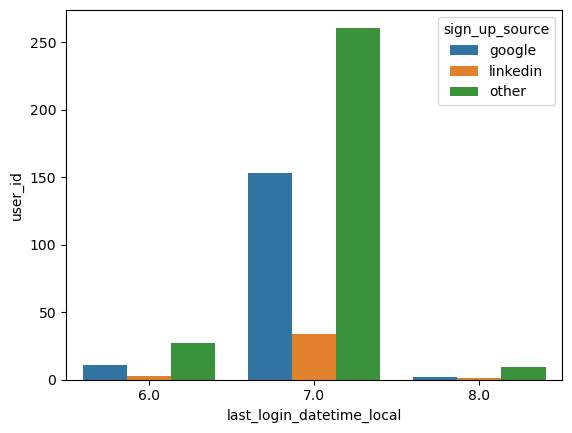

In [30]:
sns.barplot(x="last_login_datetime_local",
           y="user_id",
           hue="sign_up_source",
           data=count_month_source)

Plot bar chart group by sign source on local time (UTC)

In [31]:
count_month_source = users.groupby([users.last_login_datetime.dt.month,'sign_up_source'])['user_id'].count()
count_month_source = count_month_source.reset_index()

<AxesSubplot:xlabel='last_login_datetime', ylabel='user_id'>

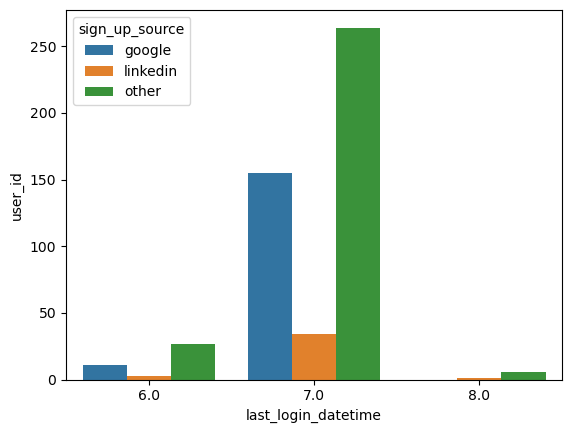

In [33]:
sns.barplot(x="last_login_datetime",
           y="user_id",
           hue="sign_up_source",
           data=count_month_source)

Calculate unsubscribe percentage by month

In [52]:
count_month_source = users.groupby([users.last_login_datetime.dt.month,'unsubscribed'])['user_id'].count()
count_month_source = count_month_source.reset_index()
count_month_source['percent'] = count_month_source['user_id']/count_month_source.groupby('last_login_datetime')['user_id'].transform('sum')*100
count_month_source

,last_login_datetime,unsubscribed,user_id,percent
0,6.0,0,40,97.560976
1,6.0,1,1,2.439024
2,7.0,0,436,96.247241
3,7.0,1,17,3.752759
4,8.0,0,7,100.000000


<AxesSubplot:xlabel='last_login_datetime', ylabel='percent'>

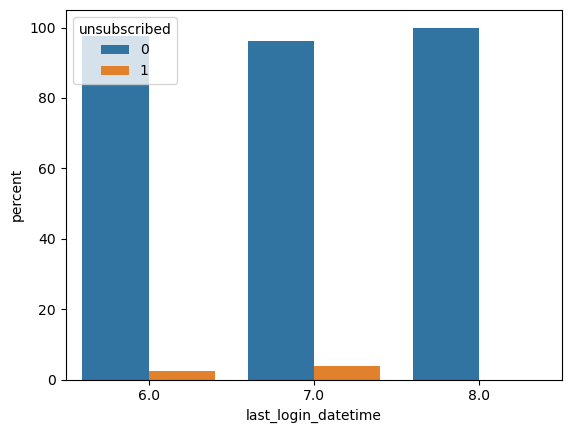

In [53]:
sns.barplot(x="last_login_datetime",
           y="percent",
           hue="unsubscribed",
           data=count_month_source)

In [72]:
count_user_breakdown = users.groupby([users.last_login_datetime.dt.day,users.last_login_datetime.dt.month,users.last_login_datetime.dt.year])['user_id'].count()
#count_user_breakdown = count_user_breakdown.reset_index()
#count_user_breakdown.rename(columns = {'last_login_datetime':'date', 'last_login_datetime':'Month','last_login_datetime':'Year'}, inplace = True